In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
import scipy.integrate.quadrature as integrar

In [2]:
def sgn(x):
    if x<0:
        return -1
    elif x==0:
        return 0
    else:
        return 1

In [3]:
x=np.linspace(-1,1,10001)
y=[]
for i in x:
    y.append(sgn(i))

Text(0.5, 1.0, 'sgn(x)')

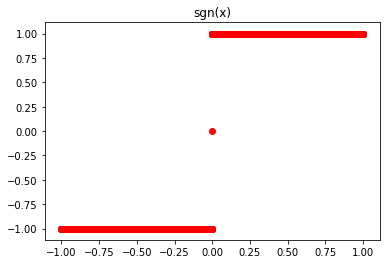

In [4]:
plt.scatter(x,y, color='r')
plt.title("sgn(x)")

In [5]:
p,w=np.polynomial.legendre.leggauss(15)
print(p)
print(" ")
print(w)

[-0.98799252 -0.93727339 -0.84820658 -0.72441773 -0.57097217 -0.39415135
 -0.20119409  0.          0.20119409  0.39415135  0.57097217  0.72441773
  0.84820658  0.93727339  0.98799252]
 
[0.03075324 0.07036605 0.10715922 0.13957068 0.16626921 0.186161
 0.19843149 0.20257824 0.19843149 0.186161   0.16626921 0.13957068
 0.10715922 0.07036605 0.03075324]


In [6]:
def P(n):
    a=1/(2**n*np.math.factorial(n))
    x=sy.Symbol("x")
    der=sy.diff((x**2-1)**n,x,n)
    poly=sy.expand(a*der)
    return poly

In [7]:
N=20
n=range(N+1)
polys=[]
for i in n:
    res=P(int(i))
    print(res)
    print(" ")
    polys.append(res)

1.00000000000000
 
1.0*x
 
1.5*x**2 - 0.5
 
2.5*x**3 - 1.5*x
 
4.375*x**4 - 3.75*x**2 + 0.375
 
7.875*x**5 - 8.75*x**3 + 1.875*x
 
14.4375*x**6 - 19.6875*x**4 + 6.5625*x**2 - 0.3125
 
26.8125*x**7 - 43.3125*x**5 + 19.6875*x**3 - 2.1875*x
 
50.2734375*x**8 - 93.84375*x**6 + 54.140625*x**4 - 9.84375*x**2 + 0.2734375
 
94.9609375*x**9 - 201.09375*x**7 + 140.765625*x**5 - 36.09375*x**3 + 2.4609375*x
 
180.42578125*x**10 - 427.32421875*x**8 + 351.9140625*x**6 - 117.3046875*x**4 + 13.53515625*x**2 - 0.24609375
 
344.44921875*x**11 - 902.12890625*x**9 + 854.6484375*x**7 - 351.9140625*x**5 + 58.65234375*x**3 - 2.70703125*x
 
660.1943359375*x**12 - 1894.470703125*x**10 + 2029.7900390625*x**8 - 997.08984375*x**6 + 219.9462890625*x**4 - 17.595703125*x**2 + 0.2255859375
 
1269.6044921875*x**13 - 3961.166015625*x**11 + 4736.1767578125*x**9 - 2706.38671875*x**7 + 747.8173828125*x**5 - 87.978515625*x**3 + 2.9326171875*x
 
2448.52294921875*x**14 - 8252.42919921875*x**12 + 10893.2065429688*x**10 - 7104

In [8]:
def coefsN(N):
    coefs=[]
    for i in range(N+1):
        a=(2*i+1)/2
        x=sy.Symbol("x")
        poly=sy.lambdify(x,P(i))
        inte1=a*-1*integrar(poly, -1, 0)[0]
        inte2=a*integrar(poly, 0, 1)[0]
        inte=inte1+inte2
        coefs.append(inte)
    return coefs

In [9]:
coefs=coefsN(N)
for i in coefs:
    print(i)
    print("")

0.0

1.5

0.0

-0.874999999999999

0.0

0.6875000000000004

-1.8041124150158794e-16

-0.5859375000000023

-1.474514954580286e-17

0.5195312499999685

4.417039650705945e-16

-0.4716796875001943

0.0

0.4350585937504158

-9.935628708657163e-16

-0.4058532716281512

0.0

0.3818511978404242

1.2836953722228372e-16

-0.36166763132007707

-1.3513495877859327e-15



In [10]:
f=0
for i in range(len(coefs)):
    termino=coefs[i]*polys[i]
    f+=termino
    print(termino)
    print("")
print("La función completa es:")
print(f)

0

1.5*x

0

-2.1875*x**3 + 1.3125*x

0

5.4140625*x**5 - 6.015625*x**3 + 1.2890625*x

-2.60468729917918e-15*x**6 + 3.55184631706251e-15*x**4 - 1.18394877235417e-15*x**2 + 5.63785129692462e-17

-15.7104492187501*x**7 + 25.3784179687501*x**5 - 11.53564453125*x**3 + 1.28173828125001*x

-7.41289354119073e-16*x**8 + 1.38374012768894e-15*x**6 - 7.98311612128233e-16*x**4 + 1.45147565841497e-16*x**2 - 4.03187682893047e-18

49.3351745605439*x**9 - 104.474487304681*x**7 + 73.1321411132768*x**5 - 18.7518310546864*x**3 + 1.2785339355468*x

7.96947829790847e-14*x**10 - 1.88750801792569e-13*x**8 + 1.55441836770351e-13*x**6 - 5.1813945590117e-14*x**4 + 5.97853218347504e-15*x**2 - 1.08700585154092e-16

-162.469699859686*x**11 + 425.515880584892*x**9 - 403.120307922529*x**7 + 165.990715026924*x**5 - 27.665119171154*x**3 + 1.27685165405326*x

0

552.352344990304*x**13 - 1723.33931636975*x**11 + 2060.51440000731*x**9 - 1177.43680000418*x**7 + 325.344378948523*x**5 - 38.2758092880615*x**3 + 1.27586030960

In [11]:
x=sy.Symbol("x")
f=sy.lambdify(x,f)
x=np.linspace(-1,1,10001)
yp=f(x)

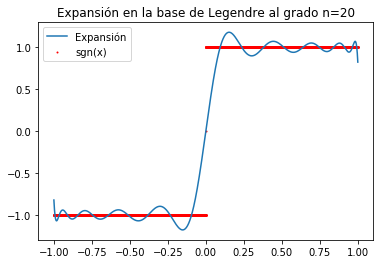

In [12]:
plt.scatter(x,y,color="r",label="sgn(x)",s=1)
plt.plot(x,yp,label="Expansión")
plt.title("Expansión en la base de Legendre al grado n=20")
plt.legend()